## Monte Carlo Simulation for Stock Portfolio
Author: Gabriel Mazzali Garcia -
Date: November 11th 2023

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf # pip install yfinance

In [2]:
# Function to get mean returns and covariance matrix
def get_data(stocks, start, end):
    stock_data = yf.download(stocks, start=start, end=end)['Adj Close']
    returns = stock_data.pct_change().dropna() # Get the % change in a daily basis
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    return mean_returns, cov_matrix

# List of stock symbols
stock_list = ['TSLA', 'AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL']

# Set start and end dates
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=360*10) # Get historical data of the last 10 years

# Get mean returns and covariance matrix
mean_returns, cov_matrix = get_data(stock_list, start=start_date, end=end_date)

# Print mean returns
print("Mean Returns:")
print(mean_returns)

# Print the covariance matrix
print("\nCovariance Matrix:")
print(cov_matrix)


[*********************100%%**********************]  6 of 6 completed
Mean Returns:
AAPL     0.001119
AMZN     0.001016
GOOGL    0.000783
MSFT     0.001141
NVDA     0.002386
TSLA     0.001853
dtype: float64

Covariance Matrix:
           AAPL      AMZN     GOOGL      MSFT      NVDA      TSLA
AAPL   0.000323  0.000205  0.000191  0.000207  0.000292  0.000264
AMZN   0.000205  0.000441  0.000238  0.000223  0.000310  0.000295
GOOGL  0.000191  0.000238  0.000310  0.000215  0.000283  0.000239
MSFT   0.000207  0.000223  0.000215  0.000293  0.000305  0.000246
NVDA   0.000292  0.000310  0.000283  0.000305  0.000861  0.000433
TSLA   0.000264  0.000295  0.000239  0.000246  0.000433  0.001238


[0.02548379 0.29582252 0.05438879 0.33563138 0.2138859  0.07478762]


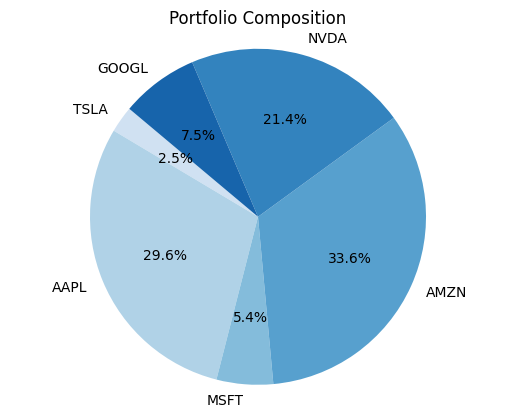

In [3]:
# Generate random weights for the portfolio and normalize them
weights = np.random.random(len(mean_returns))
weights /= np.sum(weights) # sum equals to 1

print(weights)

# Plot the Pie Chart for portfolio composition
labels = stock_list
sizes = weights
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(stock_list)))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Portfolio Composition')
plt.show()

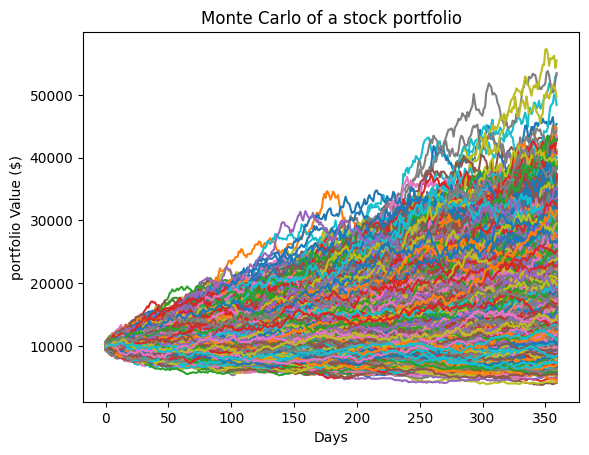

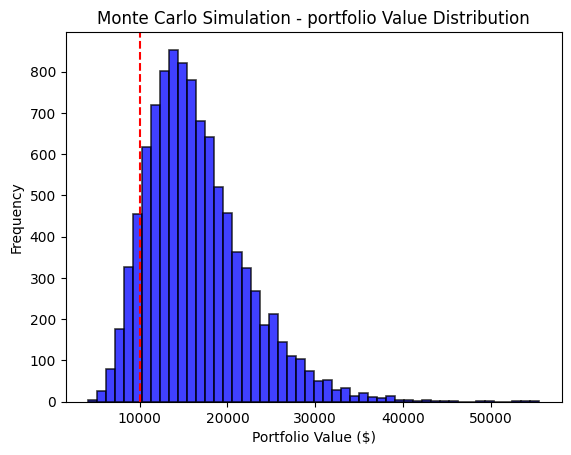

In [4]:
# Monte Carlo Method

sims = 10000 # number of simulations
timeframe = 360 # qtd of days == 1 year

# Create a matrix filled with mean returns for each day and each stock
mean_matrix = np.full(shape = (timeframe, len(weights)), fill_value=mean_returns)
mean_matrix = mean_matrix.T

# Create an empty array to store the simulated portfolio values
portfolio_sims = np.full(shape=(timeframe, sims),fill_value=0.0)

initial_port = 10000 # Initial value invested ($ 10,000 dollars in this example)

for i in range(0, sims):
    # Monte Carlo loops
    Z = np.random.normal(size=(timeframe, len(weights))) # Generate random normal variables for each day and each stock in the simulation
    L = np.linalg.cholesky(cov_matrix) # Applied Cholesky decomposition to consider the correlations between stocks
    daily_returns = mean_matrix + np.inner(L, Z)
    portfolio_sims[:,i] = np.cumprod(np.inner(weights, daily_returns.T)+1) * initial_port

# Plot the line chart
plt.plot(portfolio_sims)
plt.ylabel('portfolio Value ($)')
plt.xlabel('Days')
plt.title('Monte Carlo of a stock portfolio')
plt.show()

# Plot the histogram
plt.hist(portfolio_sims[-1, :], bins=50, alpha=0.75, color='b', edgecolor='black', linewidth=1.2)
plt.axvline(x=10000, color='r', linestyle='--')
plt.xlabel('Portfolio Value ($)')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation - portfolio Value Distribution')
plt.show()

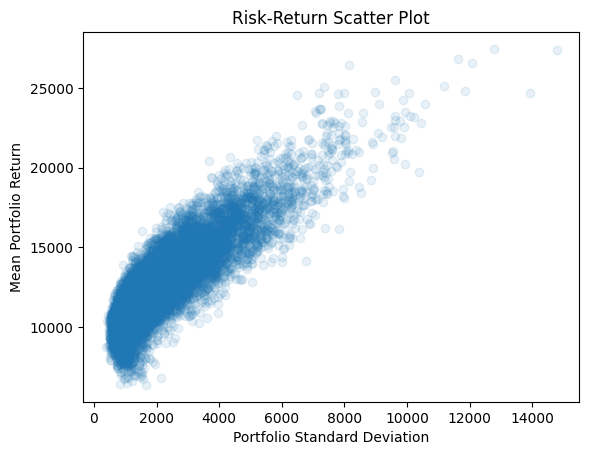

In [5]:
# Calculate mean returns and standard deviations for each simulation
mean_portfolio_returns = np.mean(portfolio_sims, axis=0)
std_portfolio_returns = np.std(portfolio_sims, axis=0)

# Plot Risk-Return Scatter Plot
plt.scatter(std_portfolio_returns, mean_portfolio_returns, alpha=0.1)
plt.title('Risk-Return Scatter Plot')
plt.xlabel('Portfolio Standard Deviation') # Shows how volatile is each simulation
plt.ylabel('Mean Portfolio Return')
plt.show()
